In [1]:
import os

print(os.getcwd())

/content


In [3]:
os.chdir('/content/drive/MyDrive/MANU_project/MANU_Spatio-temporal/Latest')

In [ ]:
!pip install monai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 18.6 MB/s eta 0:00:00


Epoch 1/5
  Training Loss: 0.9205
  Validation Dice Score: 0.0001
Epoch 2/5
  Training Loss: 0.9127
  Validation Dice Score: 0.0001
Epoch 3/5
  Training Loss: 0.9061
  Validation Dice Score: 0.0001
Epoch 4/5
  Training Loss: 0.9002
  Validation Dice Score: 0.0001
Epoch 5/5
  Training Loss: 0.8947
  Validation Dice Score: 0.0001


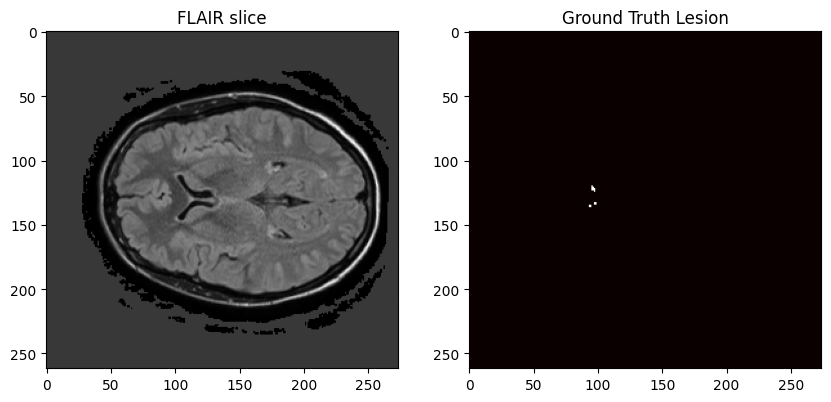

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, random_split
# import torch.nn.functional as F
# import numpy as np
# import matplotlib.pyplot as plt
# from DatasetLongMRMS import LongMRMSDataset  # your grouped dataset
# !pip install -q monai
# from monai.networks.nets import UNet
# from monai.metrics import DiceMetric
# from monai.losses import DiceLoss
# from monai.transforms import AsDiscrete

# # -----------------------------
# # 3️⃣ Helper: pad to multiple of 16
# def pad_to_multiple(x, multiple=16):
#     B, C, H, W, D = x.shape
#     H_new = ((H - 1) // multiple + 1) * multiple
#     W_new = ((W - 1) // multiple + 1) * multiple
#     D_new = ((D - 1) // multiple + 1) * multiple

#     pad_H = H_new - H
#     pad_W = W_new - W
#     pad_D = D_new - D
#     x = F.pad(x, (0, pad_D, 0, pad_W, 0, pad_H))
#     return x

# # -----------------------------
# # 4️⃣ Dataset and train/validation split
# dataset = LongMRMSDataset('/content/drive/MyDrive/MANU_project/long-MR-MS_patient01-05')
# num_val = max(1, int(len(dataset) * 0.2))  # 20% for validation
# num_train = len(dataset) - num_val
# train_dataset, val_dataset = random_split(dataset, [num_train, num_val])

# train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# # -----------------------------
# # 5️⃣ Model, loss, optimizer
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = UNet(
#     spatial_dims=3,
#     in_channels=3,
#     out_channels=1,
#     channels=(16,32,64,128,256),
#     strides=(2,2,2,2)
# ).to(device)

# bce_loss = nn.BCEWithLogitsLoss()
# dice_loss = DiceLoss(sigmoid=True)
# optimizer = optim.Adam(model.parameters(), lr=1e-4)

# dice_metric = DiceMetric(include_background=False, reduction="mean")

# # -----------------------------
# # 6️⃣ Training/Validation loop
# num_epochs = 5  # adjust as needed

# for epoch in range(num_epochs):
#     print(f"Epoch {epoch+1}/{num_epochs}")
#     model.train()
#     train_loss = 0.0

#     for batch in train_loader:
#         images = batch['images'].to(device)  # (B, T, C, H, W, D)
#         masks = batch['masks'].to(device)    # (B, T, 1, H, W, D)

#         # Flatten batch and time
#         B, T, C, H, W, D = images.shape
#         images = images.view(B*T, C, H, W, D)
#         masks = masks.view(B*T, 1, H, W, D)

#         # Pad to multiple of 16
#         images = pad_to_multiple(images, 16)
#         masks = pad_to_multiple(masks, 16)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = 0.5 * bce_loss(outputs, masks) + 0.5 * dice_loss(outputs, masks)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item()

#     train_loss /= len(train_loader)
#     print(f"  Training Loss: {train_loss:.4f}")

#     # -----------------------------
#     # Validation
#     model.eval()
#     dice_scores = []
#     with torch.no_grad():
#         for batch in val_loader:
#             images = batch['images'].to(device)
#             masks = batch['masks'].to(device)
#             B, T, C, H, W, D = images.shape
#             images = images.view(B*T, C, H, W, D)
#             masks = masks.view(B*T, 1, H, W, D)

#             images = pad_to_multiple(images, 16)
#             masks = pad_to_multiple(masks, 16)

#             outputs = model(images)
#             outputs_sigmoid = torch.sigmoid(outputs)
#             outputs_bin = AsDiscrete(threshold=0.5)(outputs_sigmoid)

#             dice = dice_metric(y_pred=outputs_bin, y=masks)
#             dice_scores.append(dice.mean().item())  # <--- fix here

#     val_dice = np.mean(dice_scores)
#     print(f"  Validation Dice Score: {val_dice:.4f}")

#     # -----------------------------
#     # Save checkpoint
#     #torch.save(model.state_dict(), f"unet_epoch{epoch+1}.pth")

# # -----------------------------
# # 7️⃣ Visualization (first patient in val set)
# sample = val_dataset[0]
# images = sample['images']  # (T, C, H, W, D)
# masks = sample['masks']

# # Take first timepoint, first modality (FLAIR)
# img = images[0,0].numpy()
# mask = masks[0,0].numpy()

# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.imshow(img[:,:,img.shape[2]//2], cmap='gray')
# plt.title('FLAIR slice')
# plt.subplot(1,2,2)
# plt.imshow(mask[:,:,mask.shape[2]//2], cmap='hot')
# plt.title('Ground Truth Lesion')
# plt.show()

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, random_split
# import torch.nn.functional as F
# import numpy as np
# import matplotlib.pyplot as plt
# from DatasetLongMRMS import LongMRMSDataset  # your grouped dataset
# !pip install -q monai
# from monai.networks.nets import UNet
# from monai.metrics import DiceMetric
# from monai.losses import DiceLoss
# from monai.transforms import AsDiscrete

# #this preserves correct tensor shapes for the network and prevents runtime shape errors.
# def pad_to_multiple(x, multiple=16):
#     B, C, H, W, D = x.shape
#     H_new = ((H - 1) // multiple + 1) * multiple
#     W_new = ((W - 1) // multiple + 1) * multiple
#     D_new = ((D - 1) // multiple + 1) * multiple
#     pad_H = H_new - H
#     pad_W = W_new - W
#     pad_D = D_new - D
#     x = F.pad(x, (0, pad_D, 0, pad_W, 0, pad_H))
#     return x

# # Extract lesion patches
# def extract_lesion_patches(images, masks, patch_size=(64,64,64)):
#     """
#     Extract patches around lesions. Each patch is padded if it goes beyond image boundaries.
#     """
#     B, C, H, W, D = images.shape
#     patches_img, patches_mask = [], []

#     p_H, p_W, p_D = patch_size

#     for b in range(B):
#         mask_nonzero = torch.nonzero(masks[b,0])
#         if len(mask_nonzero) == 0:
#             # No lesion, random patch
#             start = [np.random.randint(0, max(H - p_H, 1)),
#                      np.random.randint(0, max(W - p_W, 1)),
#                      np.random.randint(0, max(D - p_D, 1))]
#         else:
#             idx = mask_nonzero[np.random.randint(len(mask_nonzero))]
#             start = [idx[0] - p_H // 2, idx[1] - p_W // 2, idx[2] - p_D // 2]

#         # Ensure start indices are >=0
#         s_h, s_w, s_d = [max(0, s) for s in start]

#         # Compute end indices
#         e_h, e_w, e_d = s_h + p_H, s_w + p_W, s_d + p_D

#         # Crop patch
#         patch_img = images[b,:, s_h:e_h, s_w:e_w, s_d:e_d]
#         patch_mask = masks[b,:, s_h:e_h, s_w:e_w, s_d:e_d]

#         # Pad if patch is smaller than patch_size
#         pad_h = max(0, p_H - patch_img.shape[1])
#         pad_w = max(0, p_W - patch_img.shape[2])
#         pad_d = max(0, p_D - patch_img.shape[3])

#         if pad_h > 0 or pad_w > 0 or pad_d > 0:
#             patch_img = F.pad(patch_img, (0, pad_d, 0, pad_w, 0, pad_h))
#             patch_mask = F.pad(patch_mask, (0, pad_d, 0, pad_w, 0, pad_h))

#         patches_img.append(patch_img)
#         patches_mask.append(patch_mask)

#     patches_img = torch.stack(patches_img)
#     patches_mask = torch.stack(patches_mask)
#     return patches_img, patches_mask

# # -----------------------------
# # Data augmentation
# # because dataset is small and lesions few, augmentations artificially increase variety so the model doesn’t overfit.
# def augment_patch(img, mask):
#     if np.random.rand() > 0.5:
#         img = img.flip(-3)
#         mask = mask.flip(-3)
#     if np.random.rand() > 0.5:
#         img = img.flip(-2)
#         mask = mask.flip(-2)
#     return img, mask

# # Weighted BCE + Dice loss
# #this loss design balances training pressure to detect small lesions while keeping numeric stability.
# def weighted_bce_dice_loss(outputs, masks, weight=10.0):
#     bce = F.binary_cross_entropy_with_logits(outputs, masks, reduction='none')
#     weights = 1 + (weight - 1) * masks
#     bce = (bce * weights).mean()
#     dice = DiceLoss(sigmoid=True)(outputs, masks)
#     return 0.5*bce + 0.5*dice

# # Dataset and split
# dataset = LongMRMSDataset('/content/drive/MyDrive/MANU_project/long-MR-MS_patient01-05')
# num_val = max(1, int(len(dataset) * 0.2))
# num_train = len(dataset) - num_val
# train_dataset, val_dataset = random_split(dataset, [num_train, num_val])

# train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# # Model, optimizer, metric
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = UNet(
#     spatial_dims=3,
#     in_channels=3,
#     out_channels=1,
#     channels=(16,32,64,128,256),
#     strides=(2,2,2,2)
# ).to(device)

# optimizer = optim.Adam(model.parameters(), lr=1e-4)
# dice_metric = DiceMetric(include_background=False, reduction="mean")

# # -----------------------------
# # Training loop
# num_epochs = 50  # increase for better convergence

# for epoch in range(num_epochs):
#     print(f"Epoch {epoch+1}/{num_epochs}")
#     model.train()
#     train_loss = 0.0

#     for batch in train_loader:
#         images = batch['images'].to(device)
#         masks = batch['masks'].to(device)
#         B, T, C, H, W, D = images.shape
#         images = images.view(B*T, C, H, W, D)
#         masks = masks.view(B*T, 1, H, W, D)

#         # Extract lesion patches
#         images_patch, masks_patch = extract_lesion_patches(images, masks, patch_size=(64,64,64))

#         # Data augmentation
#         images_patch, masks_patch = augment_patch(images_patch, masks_patch)

#         # Pad both images and masks to multiple of 16 (for UNet)
#         images_patch = pad_to_multiple(images_patch, 16)
#         masks_patch = pad_to_multiple(masks_patch, 16)

#         # Forward pass
#         optimizer.zero_grad()
#         outputs = model(images_patch)

#         # Crop model output to original mask size
#         _, _, H, W, D = masks_patch.shape
#         outputs = outputs[:, :, :H, :W, :D]

#         # Compute weighted loss
#         loss = weighted_bce_dice_loss(outputs, masks_patch, weight=10.0)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()

#     train_loss /= len(train_loader)
#     print(f"  Training Loss: {train_loss:.4f}")

#     # -----------------------------
#     # Validation
#    # -----------------------------
# # Validation (with multiple metrics)
# model.eval()
# dice_scores, iou_list, precision_list, recall_list, f1_list, vs_list = [], [], [], [], [], []

# with torch.no_grad():
#     for batch in val_loader:
#         images = batch['images'].to(device)
#         masks = batch['masks'].to(device)
#         B, T, C, H, W, D = images.shape
#         images = images.view(B*T, C, H, W, D)
#         masks = masks.view(B*T, 1, H, W, D)

#         # Pad to multiple of 16
#         images = pad_to_multiple(images, 16)
#         masks = pad_to_multiple(masks, 16)

#         outputs = model(images)
#         outputs_sigmoid = torch.sigmoid(outputs)
#         outputs_bin = (outputs_sigmoid > 0.5).float()

#         # ----- Dice -----
#         dice = dice_metric(y_pred=outputs_bin, y=masks).mean().item()
#         dice_scores.append(dice)

#         # ----- IoU (Jaccard Index) -----
#         intersection = (outputs_bin * masks).sum().float()
#         union = outputs_bin.sum() + masks.sum() - intersection
#         iou = intersection / (union + 1e-8)
#         iou_list.append(iou.item())

#         # ----- Precision, Recall, F1 -----
#         tp = intersection
#         fp = (outputs_bin * (1 - masks)).sum().float()
#         fn = ((1 - outputs_bin) * masks).sum().float()

#         precision = tp / (tp + fp + 1e-8)
#         recall = tp / (tp + fn + 1e-8)
#         f1 = 2 * precision * recall / (precision + recall + 1e-8)

#         precision_list.append(precision.item())
#         recall_list.append(recall.item())
#         f1_list.append(f1.item())

#         # ----- Volumetric Similarity -----
#         vol_pred = outputs_bin.sum().float()
#         vol_true = masks.sum().float()
#         vs = 1 - abs(vol_pred - vol_true) / (vol_pred + vol_true + 1e-8)
#         vs_list.append(vs.item())

# # ----- Compute mean metrics across validation set -----
# val_dice = np.mean(dice_scores)
# val_iou = np.mean(iou_list)
# val_precision = np.mean(precision_list)
# val_recall = np.mean(recall_list)
# val_f1 = np.mean(f1_list)
# val_vs = np.mean(vs_list)

# print(f"  Validation Dice: {val_dice:.4f}")
# print(f"  IoU (Jaccard): {val_iou:.4f}")
# print(f"  Precision: {val_precision:.4f}")
# print(f"  Recall: {val_recall:.4f}")
# print(f"  F1-score: {val_f1:.4f}")
# print(f"  Volumetric Similarity: {val_vs:.4f}")


#     # -----------------------------
#     # Save checkpoint
#     #torch.save(model.state_dict(), f"unet_epoch{epoch+1}.pth")

#     # -----------------------------
#     # Visualization (first patient in val set)
#     sample = val_dataset[0]
#     images = sample['images']  # (T, C, H, W, D)
#     masks = sample['masks']
#     img = images[0,0].numpy()
#     mask = masks[0,0].numpy()

#     model.eval()
#     with torch.no_grad():
#         # take first timepoint of patient, all 3 modalities
#         img_tensor = torch.from_numpy(images[0].numpy()).to(device).float()  # shape [3,H,W,D]
#         img_tensor = img_tensor[None,...]  # add batch dim

#         pred = torch.sigmoid(model(pad_to_multiple(img_tensor,16)))
#         # crop to original size
#         _, _, H, W, D = img_tensor.shape
#         pred = pred.cpu().numpy()[0,0,:H,:W,:D]


#     plt.figure(figsize=(15,5))
#     plt.subplot(1,3,1)
#     plt.imshow(img[:,:,img.shape[2]//2], cmap='gray')
#     plt.title('FLAIR slice')
#     plt.subplot(1,3,2)
#     plt.imshow(mask[:,:,mask.shape[2]//2], cmap='hot')
#     plt.title('Ground Truth Lesion')
#     plt.subplot(1,3,3)
#     plt.imshow(pred[:,:,pred.shape[2]//2] > 0.5, cmap='hot')
#     plt.title('Predicted Lesion')
#     plt.show()


Output hidden; open in https://colab.research.google.com to view.


Epoch 1/150
  Training Loss: 0.8889
  Validation Dice: 0.0002 | IoU: 0.0001 | Precision: 0.0001 | Recall: 0.5727 | F1: 0.0002

Epoch 2/150
  Training Loss: 0.8810
  Validation Dice: 0.0002 | IoU: 0.0001 | Precision: 0.0001 | Recall: 0.5775 | F1: 0.0002

Epoch 3/150
  Training Loss: 0.8750
  Validation Dice: 0.0002 | IoU: 0.0001 | Precision: 0.0001 | Recall: 0.5543 | F1: 0.0002

Epoch 4/150
  Training Loss: 0.8695
  Validation Dice: 0.0002 | IoU: 0.0001 | Precision: 0.0001 | Recall: 0.5174 | F1: 0.0002

Epoch 5/150
  Training Loss: 0.8644
  Validation Dice: 0.0002 | IoU: 0.0001 | Precision: 0.0001 | Recall: 0.4884 | F1: 0.0002

Epoch 6/150
  Training Loss: 0.8596
  Validation Dice: 0.0002 | IoU: 0.0001 | Precision: 0.0001 | Recall: 0.4603 | F1: 0.0002

Epoch 7/150
  Training Loss: 0.8550
  Validation Dice: 0.0002 | IoU: 0.0001 | Precision: 0.0001 | Recall: 0.4264 | F1: 0.0002

Epoch 8/150
  Training Loss: 0.8505
  Validation Dice: 0.0002 | IoU: 0.0001 | Precision: 0.0001 | Recall: 0.41

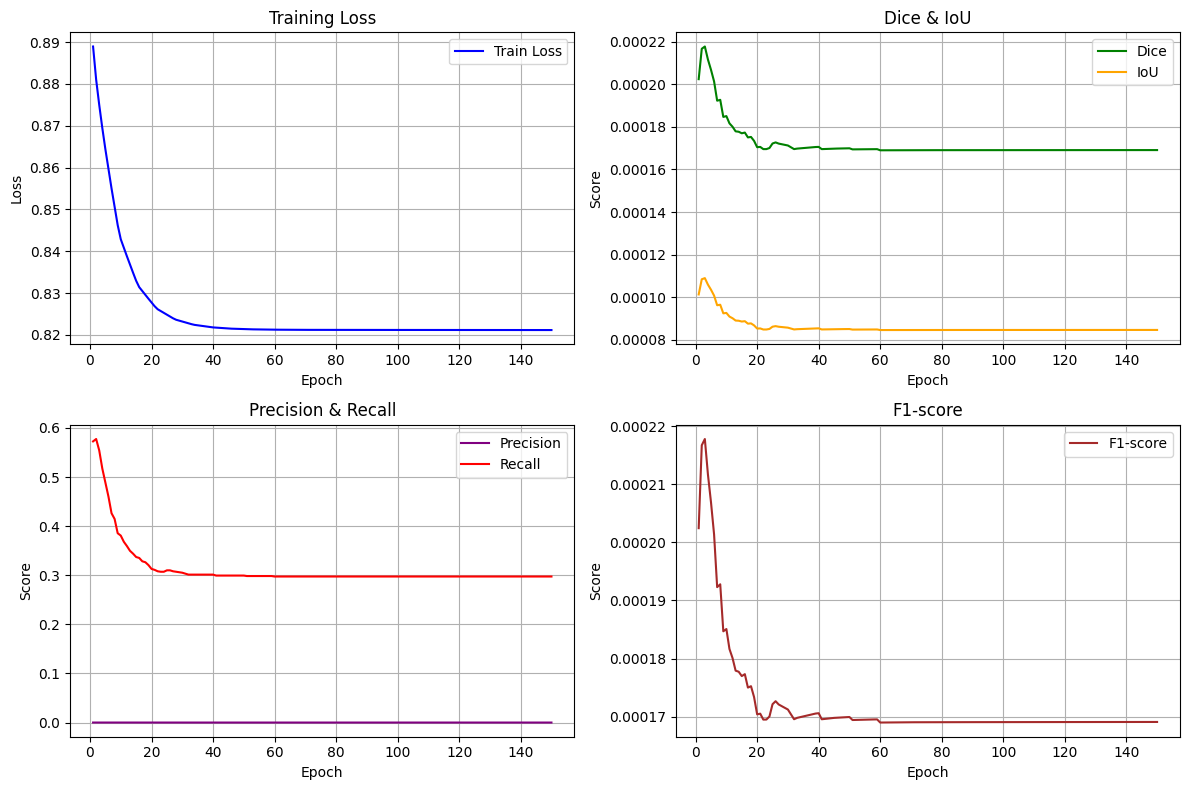

/tmp/ipython-input-988541641.py:222: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_tensor = torch.tensor(images[0]).unsqueeze(0).to(device)  # (1, C, H, W, D)


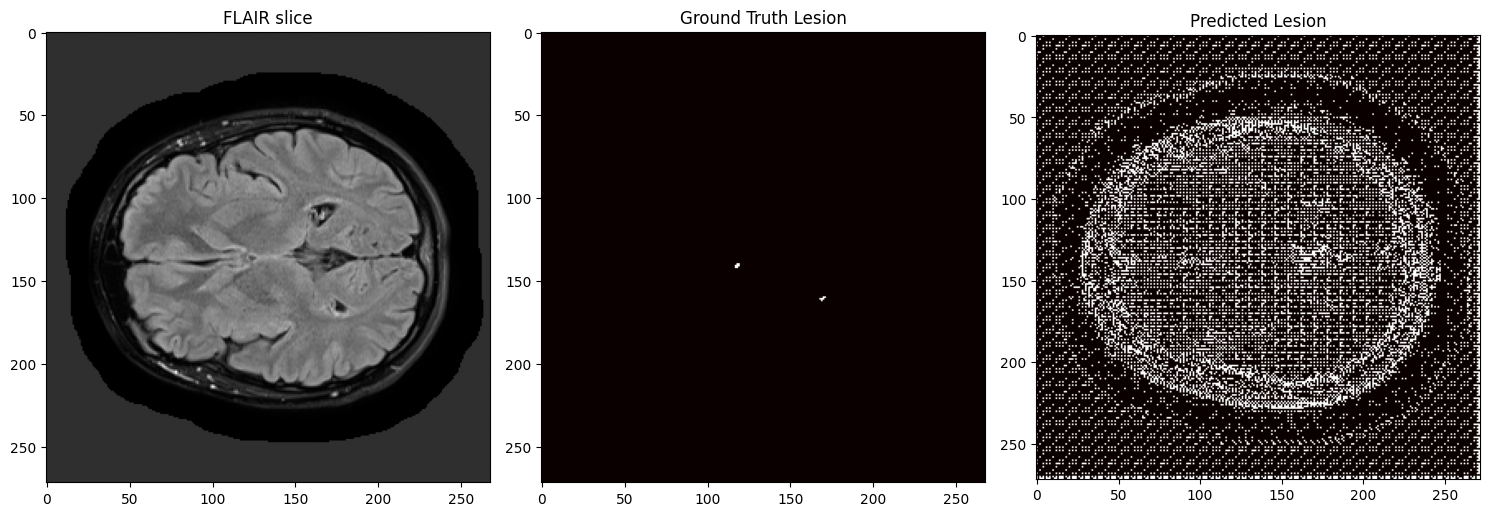

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from DatasetLongMRMS import LongMRMSDataset

from monai.networks.nets import UNet
from monai.metrics import DiceMetric
from monai.losses import DiceLoss

def pad_to_multiple(x, multiple=16):
    B, C, H, W, D = x.shape
    H_new = ((H - 1) // multiple + 1) * multiple
    W_new = ((W - 1) // multiple + 1) * multiple
    D_new = ((D - 1) // multiple + 1) * multiple

    pad_H = H_new - H
    pad_W = W_new - W
    pad_D = D_new - D
    x = F.pad(x, (0, pad_D, 0, pad_W, 0, pad_H))
    return x

# Dataset and train/validation split
dataset = LongMRMSDataset('/content/drive/MyDrive/MANU_project/long-MR-MS_patient01-05')
num_val = max(1, int(len(dataset) * 0.2))
num_train = len(dataset) - num_val
train_dataset, val_dataset = random_split(dataset, [num_train, num_val])

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# Model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(
    spatial_dims=3,
    in_channels=3,
    out_channels=1,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2)
).to(device)

bce_loss = nn.BCEWithLogitsLoss()
dice_loss = DiceLoss(sigmoid=True)
# optimizer = optim.Adam(model.parameters(), lr=1e-3)

# --- Optimizer & Scheduler Setup ---
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='max',
    factor=0.5,
    patience=5
)

dice_metric = DiceMetric(include_background=False, reduction="mean")

# Training/Validation loop
num_epochs = 150
train_losses = []
val_dice_list, val_iou_list, val_precision_list, val_recall_list, val_f1_list = [], [], [], [], []

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    model.train()
    train_loss = 0.0

    for batch in train_loader:
        images = batch['images'].to(device)  # (B, T, C, H, W, D)
        masks = batch['masks'].to(device)    # (B, T, 1, H, W, D)

        B, T, C, H, W, D = images.shape
        images = images.view(B*T, C, H, W, D)
        masks = masks.view(B*T, 1, H, W, D)

        images = pad_to_multiple(images, 16)
        masks = pad_to_multiple(masks, 16)

        optimizer.zero_grad()
        outputs = model(images)
        loss = 0.5 * bce_loss(outputs, masks) + 0.5 * dice_loss(outputs, masks)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f"  Training Loss: {train_loss:.4f}")


    # Validation (multi-metric)
    model.eval()
    dice_scores, iou_list, precision_list, recall_list, f1_list = [], [], [], [], []

    with torch.no_grad():
        for batch in val_loader:
            images = batch['images'].to(device)
            masks = batch['masks'].to(device)
            B, T, C, H, W, D = images.shape
            images = images.view(B*T, C, H, W, D)
            masks = masks.view(B*T, 1, H, W, D)

            images = pad_to_multiple(images, 16)
            masks = pad_to_multiple(masks, 16)

            outputs = model(images)
            outputs_sigmoid = torch.sigmoid(outputs)
            outputs_bin = (outputs_sigmoid > 0.5).float()

            # Dice
            dice = dice_metric(y_pred=outputs_bin, y=masks).mean().item()
            dice_scores.append(dice)

            # IoU
            intersection = (outputs_bin * masks).sum().float()
            union = outputs_bin.sum() + masks.sum() - intersection
            iou = intersection / (union + 1e-8)
            iou_list.append(iou.item())

            # Precision, Recall, F1
            tp = intersection
            fp = (outputs_bin * (1 - masks)).sum().float()
            fn = ((1 - outputs_bin) * masks).sum().float()
            precision = tp / (tp + fp + 1e-8)
            recall = tp / (tp + fn + 1e-8)
            f1 = 2 * precision * recall / (precision + recall + 1e-8)

            precision_list.append(precision.item())
            recall_list.append(recall.item())
            f1_list.append(f1.item())

    # Mean validation metrics for this epoch
    val_dice = np.mean(dice_scores)
    val_iou = np.mean(iou_list)
    val_precision = np.mean(precision_list)
    val_recall = np.mean(recall_list)
    val_f1 = np.mean(f1_list)

    val_dice_list.append(val_dice)
    val_iou_list.append(val_iou)
    val_precision_list.append(val_precision)
    val_recall_list.append(val_recall)
    val_f1_list.append(val_f1)

    print(f"  Validation Dice: {val_dice:.4f} | IoU: {val_iou:.4f} | "
          f"Precision: {val_precision:.4f} | Recall: {val_recall:.4f} | F1: {val_f1:.4f}")

    scheduler.step(val_dice)


# Plot training & validation metrics
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, val_dice_list, label='Dice', color='green')
plt.plot(epochs, val_iou_list, label='IoU', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Dice & IoU')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, val_precision_list, label='Precision', color='purple')
plt.plot(epochs, val_recall_list, label='Recall', color='red')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision & Recall')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, val_f1_list, label='F1-score', color='brown')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('F1-score')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Visualization (FLAIR, Ground Truth, and Predicted Lesion)
sample = val_dataset[0]
images = sample['images']  # (T, C, H, W, D)
masks = sample['masks']

# Take first timepoint, first modality (FLAIR)
img = images[0, 0].numpy()
mask = masks[0, 0].numpy()

# Predict using the trained model
model.eval()
with torch.no_grad():
    img_tensor = torch.tensor(images[0]).unsqueeze(0).to(device)  # (1, C, H, W, D)
    img_tensor = pad_to_multiple(img_tensor, 16)
    output = model(img_tensor)
    output_sigmoid = torch.sigmoid(output)
    output_bin = (output_sigmoid > 0.5).float()
    pred_mask = output_bin.cpu().numpy()[0, 0]

# Show FLAIR, Ground Truth, Predicted Lesion (middle slice)
slice_idx = img.shape[2] // 2
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img[:, :, slice_idx], cmap='gray')
plt.title('FLAIR slice')

plt.subplot(1, 3, 2)
plt.imshow(mask[:, :, slice_idx], cmap='hot')
plt.title('Ground Truth Lesion')

plt.subplot(1, 3, 3)
plt.imshow(pred_mask[:, :, slice_idx], cmap='hot')
plt.title('Predicted Lesion')

plt.tight_layout()
plt.show()
